# TSF 

### May -2021 Batch

## Name- SURESH KUMAR MISHRA 

#### Task-01 Predction of paercentage of marks based on study hours by a student 

In [1]:
import csv

#### BY GIVEN DATA WE HAVE CREATED A CSV FILE 

In [2]:
import csv
with open('student_study.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["SN.No","Hours", "Score"])
    writer.writerow([1, 2.5,21])
    writer.writerow([2, 5.1,47])
    writer.writerow([3, 3.2,27])
    writer.writerow([4, 8.5,75])
    writer.writerow([5, 3.5,30])
    writer.writerow([6, 1.5,20])
    writer.writerow([7, 9.2,88])
    writer.writerow([8, 5.5,60])
    writer.writerow([9, 8.3,81])
    writer.writerow([10, 2.7,25])
    writer.writerow([11, 7.7,85])
    writer.writerow([12, 5.9,62])
    writer.writerow([13, 4.5,41])
    writer.writerow([14, 3.3,42])
    writer.writerow([15, 1.1,17])
    writer.writerow([16, 8.9,95])
    writer.writerow([17, 2.5,30])
    writer.writerow([18, 1.9,24])
    writer.writerow([19, 6.1,67])
    writer.writerow([20, 7.4,69])
    writer.writerow([21, 2.7,30])
    writer.writerow([22, 4.8,54])
    writer.writerow([23, 3.8,35])
    writer.writerow([24, 6.9,76])
    writer.writerow([25, 7.8,86])

#### NOW WE HAVE A CSV FILE NAME AS STUDENT_STUDY.CSV

#### NOW LET'S IMPORTANT LIBRARY TO PERFORM OPERATIONS ON DATASET

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv('student_study.csv')

In [5]:
df.head()

,SN.No,Hours,Score
0,1,2.5,21
1,2,5.1,47
2,3,3.2,27
3,4,8.5,75
4,5,3.5,30


####  FIRST FIVE ROWS OF DATASET

In [6]:
df.tail()

,SN.No,Hours,Score
20,21,2.7,30
21,22,4.8,54
22,23,3.8,35
23,24,6.9,76
24,25,7.8,86


#### LAST FIVE ROWS OF DATASET

#### LET'S EXPLORE SOME STATISTICAL INSIGHTS LIKE MEAN COUNT 25 , 50 AND 75 % STD AND MAX ETC .

In [7]:
df.describe()

,SN.No,Hours,Score
count,25.000000,25.000000,25.000000
mean,13.000000,5.012000,51.480000
std,7.359801,2.525094,25.286887
min,1.000000,1.100000,17.000000
25%,7.000000,2.700000,30.000000
50%,13.000000,4.800000,47.000000
75%,19.000000,7.400000,75.000000
max,25.000000,9.200000,95.000000


#### LET'S CHECK OUR DATASET HAVING ANY MISSING OR NULL DATA POINT 

In [8]:
df.isnull().sum()

SN.No    0
Hours    0
Score    0
dtype: int64

#### NOW WE CAN VISUALISE DATA DISTRIBUTION BY SCATTER PLOT

<AxesSubplot:>

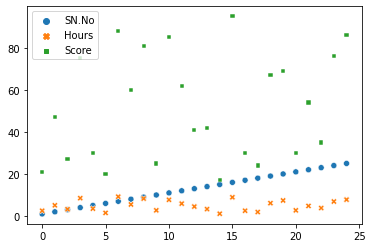

In [9]:
sns.scatterplot(data=df)

#### SINCE SL NO HAS INSIGNIFICANT COLUMN THERE IS NO IMPACT ON OUR TARGET COLUMN(SCORE) SO WE CAN DROP THAT COLUMN .

In [10]:
df=df.drop('SN.No',axis=1)

#### HERE WE CAN CHECK OUR DATASET AGAIN AFTER DROPPING SL NO COLUMN

In [11]:
df.head()

,Hours,Score
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<AxesSubplot:>

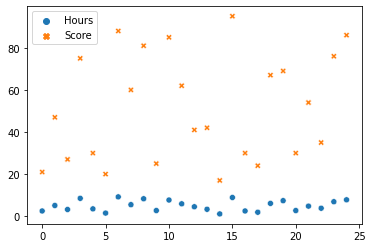

In [12]:
sns.scatterplot(data=df,marker='*')

### let's see data distribution after dropping SL NO column

In [13]:
import matplotlib.pyplot as plt

#### Here we can check data distribution using box plot

<AxesSubplot:>

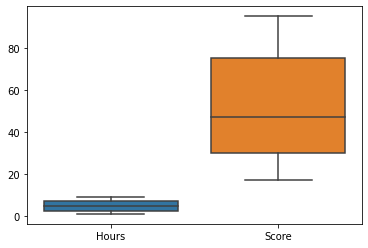

In [14]:
sns.boxplot(data=df)

#### Here we can see distribution of independent variable

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <BarContainer object of 10 artists>)

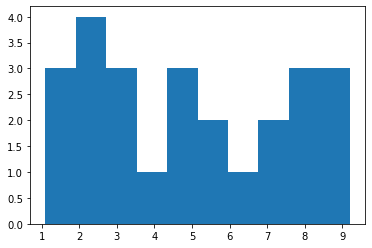

In [15]:
plt.hist(df['Hours'])

#### Here we can check histogram plot of target column

<AxesSubplot:xlabel='Score', ylabel='Count'>

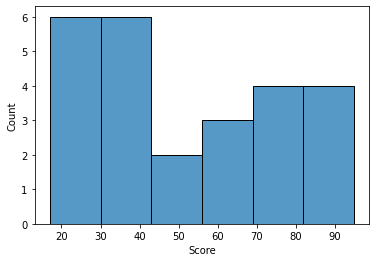

In [16]:
sns.histplot(df['Score'])

### model building

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y=df['Score']  #This is my Target Variable

In [19]:
X=df.drop('Score',axis=1)

In [20]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Score, dtype: int64

In [21]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)   # splitting dataset into training and testing 

In [23]:
X_train.head()

,Hours
12,4.5
8,8.3
9,2.7
3,8.5
19,7.4


In [24]:
y_train.head()

12    41
8     81
9     25
3     75
19    69
Name: Score, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc=StandardScaler()

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred=lr.predict(X_test)

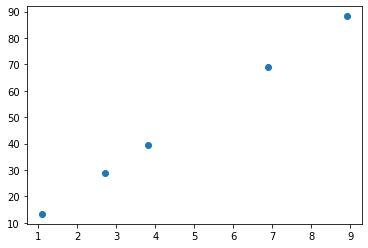

In [31]:
plt.scatter(x=X_test,y=y_pred)

In [32]:
m=lr.coef_              # since it's clear from above graph our target and indepent feature has positive correlation . 
                         #let's find coefficint and intercept.
m

array([9.59563563])

In [33]:
c=lr.intercept_
c

2.8102364628265804

In [34]:
# Since it's simple linear regression so here we are trying to calculate manually by putting in formula y= mx+c.
score=df['Hours']*m + c
score.head()

0    26.799326
1    51.747978
2    33.516270
3    84.373139
4    36.394961
Name: Hours, dtype: float64

In [35]:
hours=9.25   ## here we are checking what will be score corresponding to given value of hours(task)
prediction_score= (hours *m )+ c    ## Manually we are checking here by putting in form of formula
prediction_score

array([91.56986604])

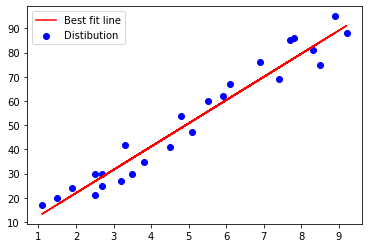

In [36]:
plt.scatter(df['Hours'],df['Score'],color='blue',label='Distibution')
plt.plot(df['Hours'],score,color='red',label='Best fit line')
plt.legend()

#### Training score

In [37]:
lr.score(X_train,y_train)     ## Training score is 94 %.

0.9444169959416537

#### Testing score

In [38]:
lr.score(X_test,y_test)     ## Testing accuracy is 97 %.

0.971014141329942

### Now let's predict by model for given hours=9.25

In [39]:
lr.predict([[9.25]])

array([91.56986604])

#### My model is predicting very very  close to expected value.

In [40]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.5916495300630285


In [41]:
MSE=metrics.mean_squared_error(y_test,y_pred)
MSE

25.58407829653998

In [42]:
RMSE=np.sqrt(MSE)
RMSE

5.0580706100785084

### OLS MODEL 

In [43]:
import statsmodels.api as sm
P=sm.add_constant(df)
result=sm.OLS(y,df).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.799e+31
Date:                Wed, 19 May 2021   Prob (F-statistic):                        0.00
Time:                        20:38:24   Log-Likelihood:                          747.09
No. Observations:                  25   AIC:                                     -1490.
Df Residuals:                      23   BIC:                                     -1488.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------